In [2]:
import imgaug.augmenters as iaa #data augmentation
import cv2 #image processing library
import matplotlib.pyplot as plt #to display the images

In [3]:
img = cv2.imread('Ben eats 6 strawberries at breakfast and 3 strawberries at lunch. How many strawberries did he eat altogether.PNG')
img1 = cv2.imread('There are 6 birds in a tree and 7 birds are in the next tree. How many birds are in the tree altogether.PNG')
img2 = cv2.imread('I buy 6 bottles of lemonade .If there are 2 litres in each bottle, how many litres of lemonade have I bought.PNG')


**Resizing Image**

In [4]:
img_resized = cv2.resize(img, (512, 512))
img_resized1 = cv2.resize(img1, (512, 512))
img_resized2 = cv2.resize(img2, (512, 512))

**Normalize the images** : Normalize the pixel values of the images to have zero mean and unit variance, which can improve model performance.

 - 'alpha' is a parameter that scales the pixel values of the input image. This means that each pixel value in the input image is multiplied by the alpha value.
 - 'beta' is a parameter that shifts the pixel values of the input image. This means that each pixel value in the input image is added to the beta value.

In [7]:
img_normalized = cv2.normalize(img_resized, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img_normalized1 = cv2.normalize(img_resized1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img_normalized2 = cv2.normalize(img_resized2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

**Augment the images** : Data augmentation can improve the performance of the model by creating new training samples. Use libraries like imgaug or albumentations to augment the images

### A function that displays multiple images in a row

In [1]:
def display_3_images(im1,im2,im3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
    ax1.imshow(im1)
    ax2.imshow(im2)
    ax3.imshow(im3)
    plt.show()

### Rotating

Image Rotation can help to reduce overfitting by increasing the diversity of the training data. By creating multiple versions of each image with different rotation angles,

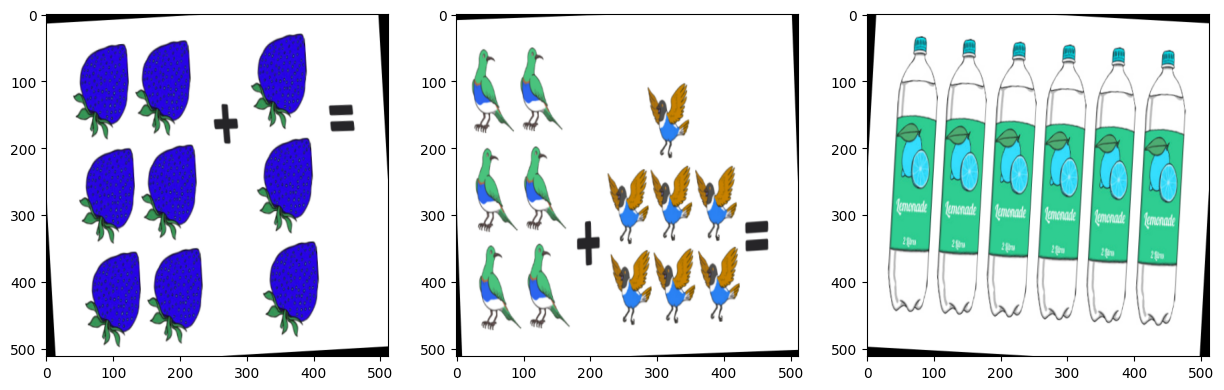

In [16]:
augmenter = iaa.Sequential([iaa.Flipud(0.5), iaa.Affine(rotate=(-10, 10))])

img_augmented = augmenter(image=img_normalized)

img_augmented1 = augmenter(image=img_normalized1)

img_augmented2 = augmenter(image=img_normalized2)

display_3_images(img_augmented,img_augmented1,img_augmented2)



### Blurring

Image blurring or smoothing can be done using various filter kernels to remove noise and reduce image details

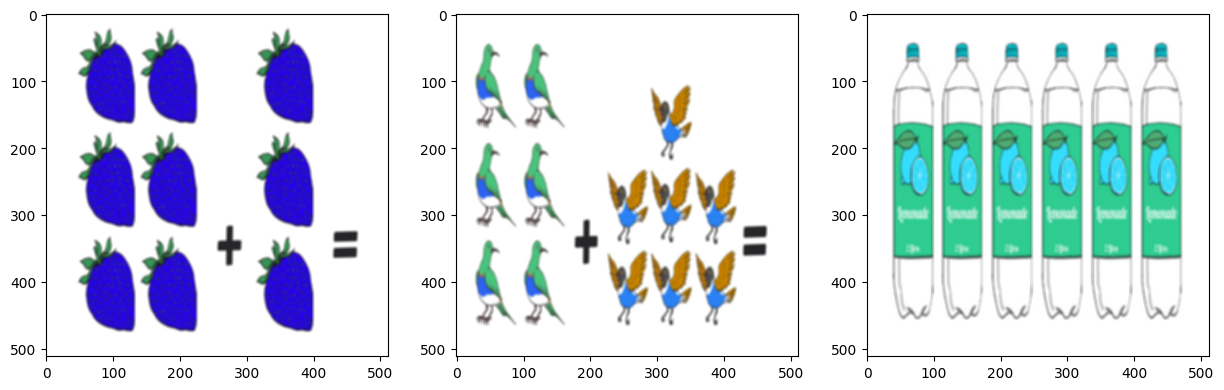

In [15]:
img_blur = cv2.blur(img_normalized, (5, 5))
img_blur1 = cv2.blur(img_normalized1, (5, 5))
img_blur2 = cv2.blur(img_normalized2, (5, 5))
display_3_images(img_blur,img_blur1,img_blur2)


### Grayscale Conversion

Grayscale conversion can simplify the image processing and reduces the amount of data required for analysis

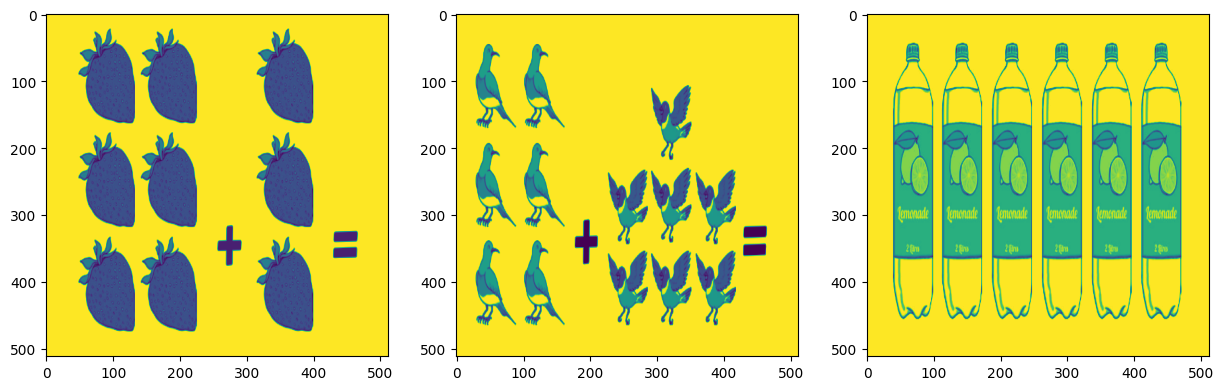

In [14]:
img_gray_scale = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
img_gray_scale1 = cv2.cvtColor(img_resized1, cv2.COLOR_BGR2GRAY)
img_gray_scale2 = cv2.cvtColor(img_resized2, cv2.COLOR_BGR2GRAY)
display_3_images(img_gray_scale,img_gray_scale1,img_gray_scale2)


### Image Edge Detection

Image edge detection is a process of identifying the boundaries between regions with different color intensities in an image

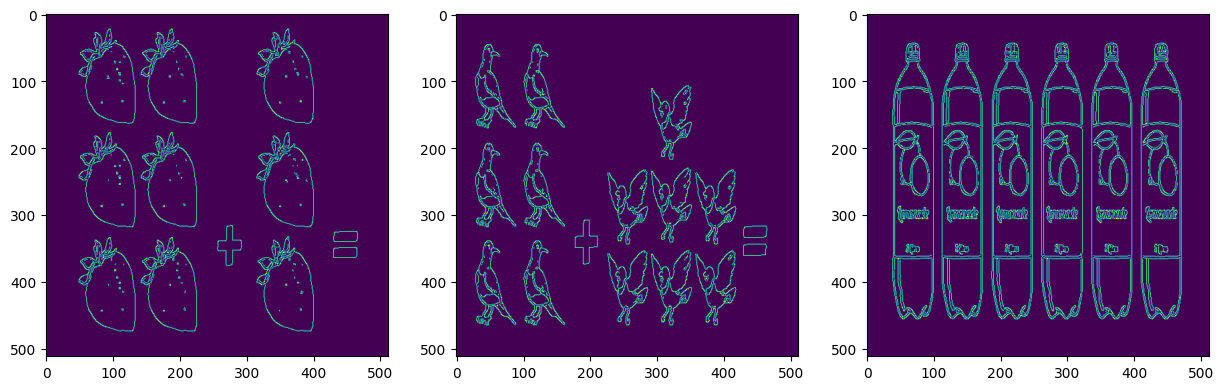

In [13]:
img_edges = cv2.Canny(img_gray_scale, 100, 200)
img_edges1 = cv2.Canny(img_gray_scale1, 100, 200)
img_edges2 = cv2.Canny(img_gray_scale2, 100, 200)
display_3_images(img_edges,img_edges1,img_edges2)


### Image Thresholding

Image thresholding is a process of converting a grayscale image into a binary image by setting all pixels above a certain threshold to white and all below to black

In [2]:
_, img_thresh = cv2.threshold(img_gray_scale, 128, 255, cv2.THRESH_BINARY)
_, img_thresh1 = cv2.threshold(img_gray_scale1, 128, 255, cv2.THRESH_BINARY)
_, img_thresh2 = cv2.threshold(img_gray_scale2, 128, 255, cv2.THRESH_BINARY)
display_3_images(img_thresh,img_thresh1,img_thresh2)


NameError: name 'cv2' is not defined